In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
iris=pd.read_csv("Iris.csv")

In [3]:
iris.tail(60)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
90,91,5.5,2.6,4.4,1.2,Iris-versicolor
91,92,6.1,3.0,4.6,1.4,Iris-versicolor
92,93,5.8,2.6,4.0,1.2,Iris-versicolor
93,94,5.0,2.3,3.3,1.0,Iris-versicolor
94,95,5.6,2.7,4.2,1.3,Iris-versicolor
95,96,5.7,3.0,4.2,1.2,Iris-versicolor
96,97,5.7,2.9,4.2,1.3,Iris-versicolor
97,98,6.2,2.9,4.3,1.3,Iris-versicolor
98,99,5.1,2.5,3.0,1.1,Iris-versicolor
99,100,5.7,2.8,4.1,1.3,Iris-versicolor


In [4]:
iris.drop("Id",axis=1,inplace=True)

In [5]:
iris.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

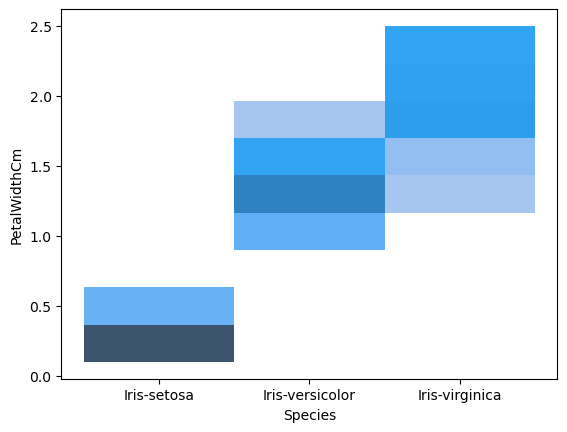

In [6]:
sns.histplot(data=iris,y=iris.PetalWidthCm,x= iris.Species)
plt.show()

##### From the above plot we conclude that we can also predict `Iris-setosa` only by using petal width cm

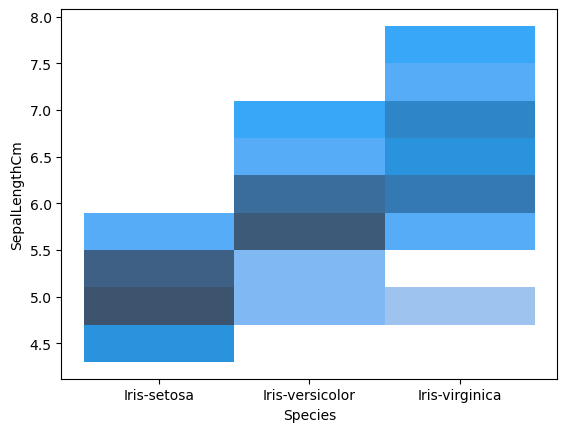

In [7]:
sns.histplot(data=iris,y=iris.SepalLengthCm,x= iris.Species)
plt.show()

In [8]:
iris["Species"].replace({'Iris-setosa': 1, 'Iris-versicolor': 2, 'Iris-virginica': 3}, inplace=True)

In [9]:
from sklearn.model_selection import train_test_split
X= iris.drop("Species",axis =1)
y= iris['Species']

In [10]:
X1_train,X1_test,y1_train,y1_test=train_test_split(X,y,train_size=0.7)

In [11]:
from sklearn.svm import SVC

In [12]:
svc = SVC(kernel='rbf', C=100, gamma=0.1)
svc.fit(X1_train, y1_train)

SVC(C=100, gamma=0.1)

In [13]:
predictions = svc.predict(X1_test)
predictions

array([1, 3, 3, 2, 3, 3, 2, 2, 3, 3, 3, 2, 3, 2, 2, 1, 1, 3, 2, 2, 2, 1,
       2, 3, 2, 2, 3, 3, 2, 1, 1, 1, 3, 3, 1, 2, 3, 1, 1, 3, 3, 1, 3, 1,
       3], dtype=int64)

In [14]:
from sklearn.metrics import classification_report
pd.DataFrame(classification_report(y1_test,predictions,output_dict=True)).transpose()


,precision,recall,f1-score,support
1,1.000000,1.000000,1.000000,12.000000
2,0.928571,1.000000,0.962963,13.000000
3,1.000000,0.950000,0.974359,20.000000
accuracy,0.977778,0.977778,0.977778,0.977778
macro avg,0.976190,0.983333,0.979107,45.000000
weighted avg,0.979365,0.977778,0.977904,45.000000
